# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [49]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [50]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units="metric"
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units

# Get weather data
    weather_response = requests.get(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
   
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
   
        city_lng = city_weather["coord"]["lon"]
        city_lat = city_weather["coord"]["lat"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]['all']
        city_wind = city_weather["wind"]['speed']
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | berber
Processing Record 2 of Set 1 | broken hill
Processing Record 3 of Set 1 | enkhuizen
Processing Record 4 of Set 1 | wynyard
Processing Record 5 of Set 1 | badger
Processing Record 6 of Set 1 | tazovsky
Processing Record 7 of Set 1 | onega
Processing Record 8 of Set 1 | jaguaribe
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | juba
Processing Record 13 of Set 1 | island harbour
Processing Record 14 of Set 1 | kone
Processing Record 15 of Set 1 | heihe
Processing Record 16 of Set 1 | steinbach
Processing Record 17 of Set 1 | bu'aale
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | dali
Processing Record 20 of Set 1 | ayaguz
City not found. Skipping...
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | udachny
Processing Record 2

In [51]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data
# Show Record Count
city_data

[{'City': 'berber',
  'Lat': 18.0216,
  'Lng': 33.983,
  'Max Temp': 45.29,
  'Humidity': 10,
  'Cloudiness': 43,
  'Wind Speed': 7.04,
  'Country': 'SD',
  'Date': 1717939968},
 {'City': 'broken hill',
  'Lat': -31.95,
  'Lng': 141.4333,
  'Max Temp': 11.96,
  'Humidity': 55,
  'Cloudiness': 95,
  'Wind Speed': 2.3,
  'Country': 'AU',
  'Date': 1717939968},
 {'City': 'enkhuizen',
  'Lat': 52.7,
  'Lng': 5.2833,
  'Max Temp': 16.67,
  'Humidity': 68,
  'Cloudiness': 77,
  'Wind Speed': 3.13,
  'Country': 'NL',
  'Date': 1717939969},
 {'City': 'wynyard',
  'Lat': -41,
  'Lng': 145.7167,
  'Max Temp': 7.04,
  'Humidity': 82,
  'Cloudiness': 5,
  'Wind Speed': 3.09,
  'Country': 'AU',
  'Date': 1717939969},
 {'City': 'badger',
  'Lat': 64.8,
  'Lng': -147.5333,
  'Max Temp': 18.41,
  'Humidity': 54,
  'Cloudiness': 75,
  'Wind Speed': 3.09,
  'Country': 'US',
  'Date': 1717939969},
 {'City': 'tazovsky',
  'Lat': 67.4667,
  'Lng': 78.7,
  'Max Temp': 4.43,
  'Humidity': 68,
  'Cloudiness':

In [52]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,berber,18.0216,33.9830,45.29,10,43,7.04,SD,1717939968
1,broken hill,-31.9500,141.4333,11.96,55,95,2.30,AU,1717939968
2,enkhuizen,52.7000,5.2833,16.67,68,77,3.13,NL,1717939969
3,wynyard,-41.0000,145.7167,7.04,82,5,3.09,AU,1717939969
4,badger,64.8000,-147.5333,18.41,54,75,3.09,US,1717939969


In [53]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [54]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,berber,18.0216,33.9830,45.29,10,43,7.04,SD,1717939968
1,broken hill,-31.9500,141.4333,11.96,55,95,2.30,AU,1717939968
2,enkhuizen,52.7000,5.2833,16.67,68,77,3.13,NL,1717939969
3,wynyard,-41.0000,145.7167,7.04,82,5,3.09,AU,1717939969
4,badger,64.8000,-147.5333,18.41,54,75,3.09,US,1717939969


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

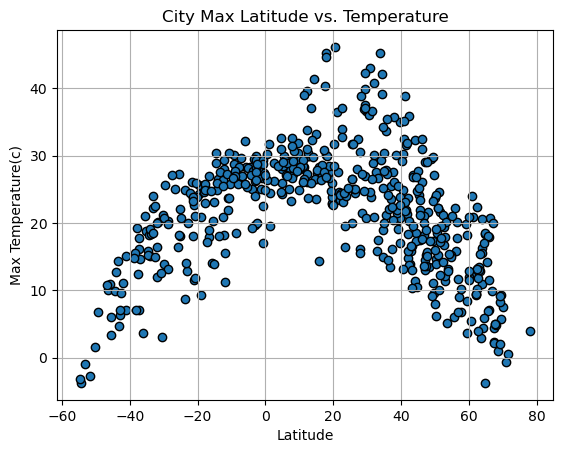

In [55]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(c)")
plt.title("City Max Latitude vs. Temperature")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

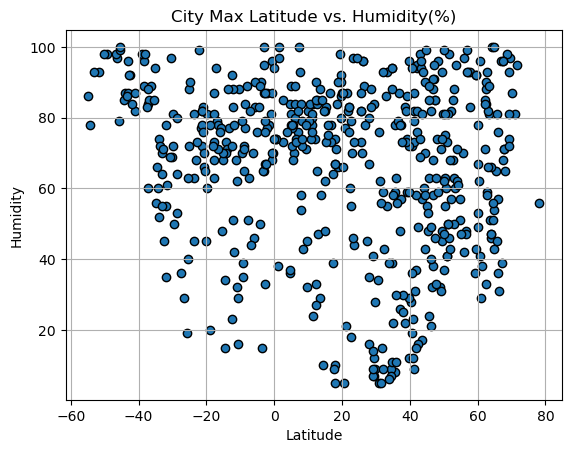

In [56]:
# Build scatter plot for latitude vs. Humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Max Latitude vs. Humidity(%)")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

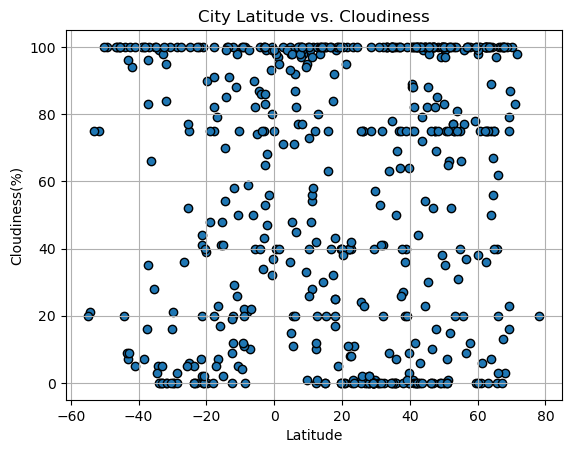

In [57]:
# Build scatter plot for latitude vs. 	Cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

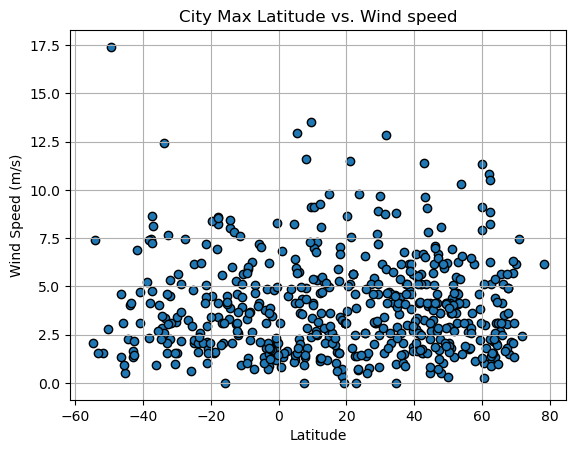

In [58]:
# Build scatter plot for latitude vs. Wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind speed")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
from scipy.stats import linregress

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,berber,18.0216,33.9830,45.29,10,43,7.04,SD,1717939968
2,enkhuizen,52.7000,5.2833,16.67,68,77,3.13,NL,1717939969
4,badger,64.8000,-147.5333,18.41,54,75,3.09,US,1717939969
5,tazovsky,67.4667,78.7000,4.43,68,13,3.04,RU,1717939969
6,onega,63.9061,38.1404,16.33,46,50,1.33,RU,1717939906


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,broken hill,-31.9500,141.4333,11.96,55,95,2.30,AU,1717939968
3,wynyard,-41.0000,145.7167,7.04,82,5,3.09,AU,1717939969
7,jaguaribe,-5.8906,-38.6219,32.12,46,90,4.14,BR,1717939969
9,puerto natales,-51.7236,-72.4875,-2.75,93,75,1.54,CL,1717939928
13,kone,-21.0595,164.8658,22.72,83,100,2.11,NC,1717939970


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6913017716216224


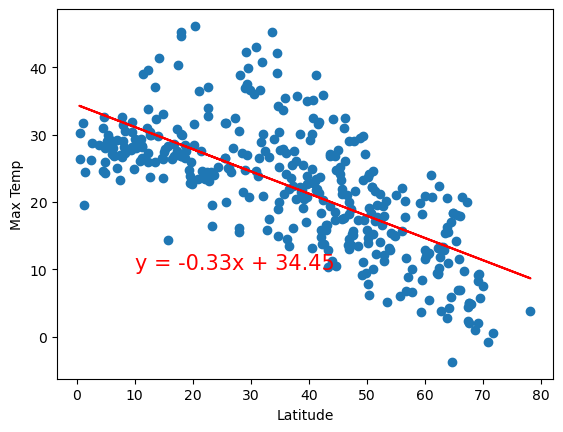

In [64]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.7876364446531883


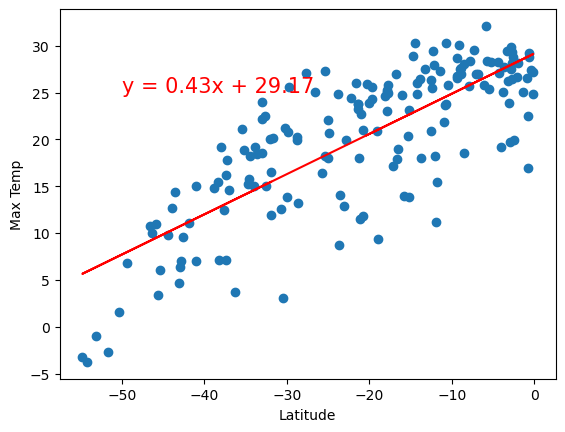

In [65]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
In Nortern Hemisphere we are able to see Negative Correlation as the latitude increases the temperature decreases and in southern Hemisphere its Positive correlation as the temperature decreases the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.015449689900661383


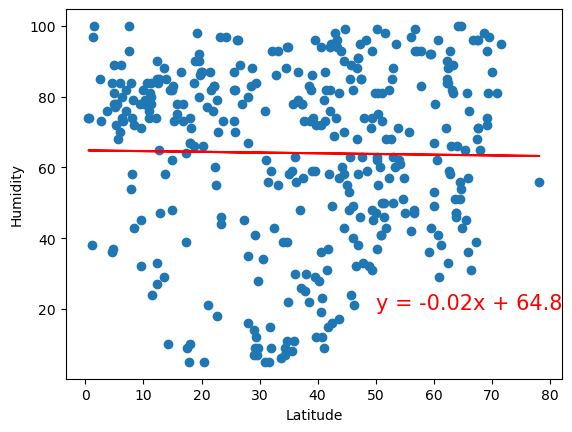

In [67]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.24404874976937785


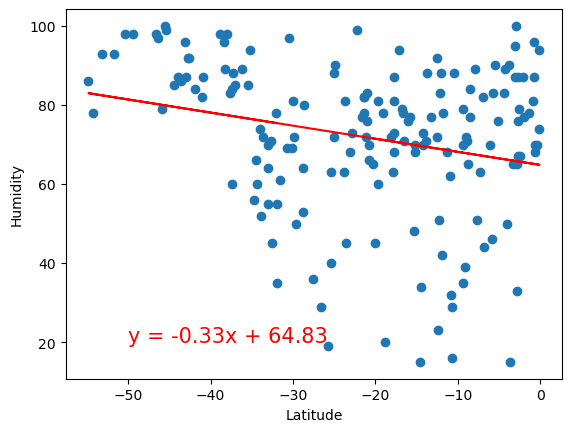

In [68]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** Both  Nortern Hemisphere and  southern Hemisphere  shows a weak Negative correlation 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05636682693422006


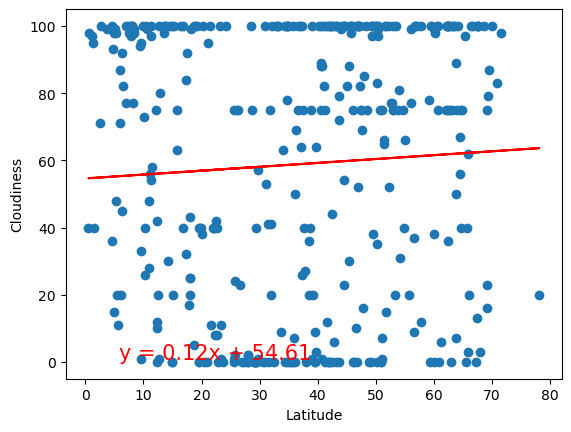

In [69]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.0324628392699508


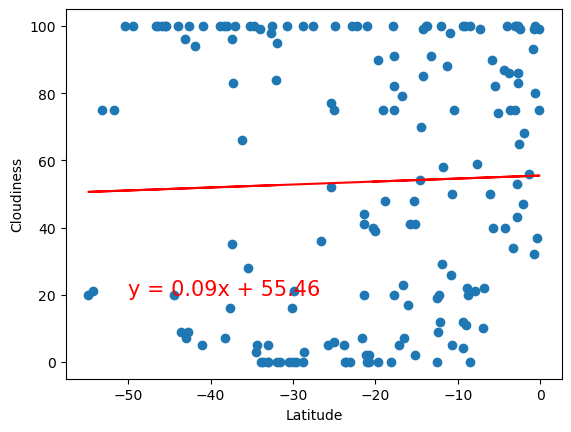

In [72]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:**Both  Nortern Hemisphere and  southern Hemisphere  shows a weak Positive correlation 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.026988489426626842


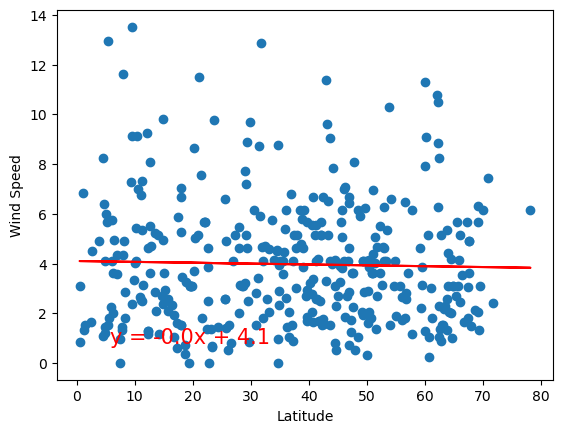

In [73]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.08549232932563733


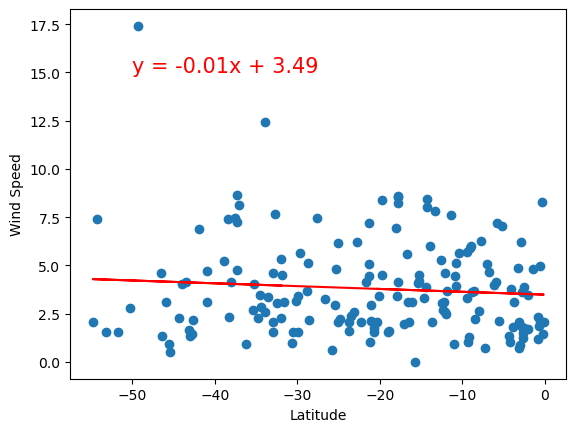

In [75]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** Both  Nortern Hemisphere and  southern Hemisphere  shows a weak Negative correlation 